## Module: Fundamentals of Data Analysis

## Project: Normal Distribution

## Contents
1. [Introduction](#Introduction)<br>
    i. [An explanation of the Normal Distribution](#An-explanation-of-the-Normal-Distribution)<br>
    ii. [Terms used](#Terms-used)<br>
    iii. [Import libraries](#Import-libraries)
2. [Construction of a Normal Distribution](#Construction-of-a-Normal-Distribution)<br>
    i. [Using Numpy](#Using-Numpy)<br>
    ii.[Using Sci-py](#Using-Sci-py)<br>
    iii.[Multiple Normal Distributions](#Multiple-Normal-Distributions)<br>
    iv. [Demonstration of Kurtosis](#Demonstration-of-Kurtosis)<br>
    v. [Demonstration of Skewness](#Demonstration-of-Skewness)<br>
3. [The empirical rule](#The-emperical-rule)<br>
4. [The Central Limit Theorem](#The-Central-Limit-Theorem)<br>
    i. [Standard Error](#Standard-Error)<br>
5. [Real-world data](#Real-world-data)<br>
    i. [Check folder](#Check-folder)<br>
    ii. [Import dataset](#Import-dataset)<br>
    iii. [Basic statistics of a variable](#Basic-statistics-of-a-variable)<br>
6. [Kurtosis of data using Pandas and Scipy](#Kurtosis-of-data-using-Pandas-and-Scipy)<br>
    i. [Correction for statistical bias](#Correction-for-statistical-bias)<br>
    ii. [Normalise data and recalculate](#Normalise-data-and-recalculate)<br>
7. [Skewness of data using pandas and scipy](#Skewness-of-data-using-pandas-and-scipy)<br>
8. [The central limit theorem: real world data](#The-central-limit-theorem:-real-world-data)<br>
    i. [Mean of sample size](#Mean-of-sample-size)<br>
    ii. [Mean of different sample sizes](#Mean-of-different-sample-sizes)<br>
9. [Proof of the Empirical rule](#Proof-of-the-Empirical-rule)<br>
    i. [Recap of data](#Recap-of-data)<br>
    ii. [Standard deviations about the mean](#Standard-deviations-about-the-mean)<br>
    iii. [Plot the standard deviations](#Plot-the-standard-deviations)<br>
    iv. [Confirmation of Empirical rule](#Confirmation-of-Empirical-rule)<br>
    v. [One standard deviation](#One-standard-deviation)<br>
    vi. [Two Standard deviations](#Two-Standard-deviations)<br>
    vii.[Three Standard deviations](#Three-Standard-deviations)<br>
10. [Conclusion](#Conclusion)<br>
11. [References](#References)<br>

## Introduction

### An explanation of the Normal Distribution 

A Normal distribution is also known as a Gaussian distribution. One of the characteristics of the Normal distribution is that it's symetrical about the mean, which means that data near the mean occurs more frequently than data far away from the mean. 

Because of this, it's more commonly known as a "bell curve", because of the visual shape of the plot.

Another characteristic of the normal distribution is that the mean is 0 and the standard deviation determines the width of the distribution.
Some natural phenomena follow a normal distribution, like the height of a population in a country.

### Terms used

mean = average<br>
median = midpoint<br>
mode = most frequent observation<br>

In a Normal distribution, 
mean = median = mode
i.e, they're all equal to one another and they represent the highest point of the distribution.

**Variance**
The distance of each data point from the mean.

**Standard Deviation**
The measure of the amount of variation of a dataset.
Standard deviation is the square root of variance.

**Skewness**
This is a term used to measure the degree of symetry about the mean of a Normal distribution.
A normal distribution is symmetrical and has a skewness of zero.

If the distribution is left-skewed (negative skewness) then the left tail of the distribution is longer than the right tail.
Right-skewed distributions have a right tail that is longer than the left tail.

**Kurtosis**
Kurtosis is a term used to measure the weight of a distribution's tails relative to the median.
In a normal distribution, kurtosis = 3.0 and is known as *mesokurtic*. <br>
A *Leptokurtic* distribution is also known as having 'fat tails', i.e. kurtosis is greater than 3.0 and will likely have a 'skinny' centre.<br>
A *Platykurtic* distribution will have a kurtosis value of less than 3.0, and have 'skinny tails'.

**Probability Density Function**
More commonly referred to as a PDF, it's used to find the probability of a variable falling within a range of values, as opposed to determining one particular value.

### Import libraries

In [393]:
# Import required libraries
# Numerical analysis, statistics
import numpy as np
from numpy.random import default_rng
from scipy.stats import norm, kurtosis, skew, skewtest
import pandas as pd
import os

import collections

import tensorflow as tf

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Construction of a Normal Distribution

### Using Numpy

Creating a normal distribution using Numpy:
We need to specify $\mu$ (mean), $\sigma$ (standard deviation) and the amount of samples.

In [251]:
mu, sigma = 0, 0.1 # mean and standard deviation
# 1000 samples
s = np.random.normal(mu, sigma, 1000)

In [252]:
# verify the mean
abs(mu - np.mean(s))

0.0008646405849207328

In [253]:
# verify the variance
abs(sigma - np.std(s, ddof=1))

0.002964175830661761

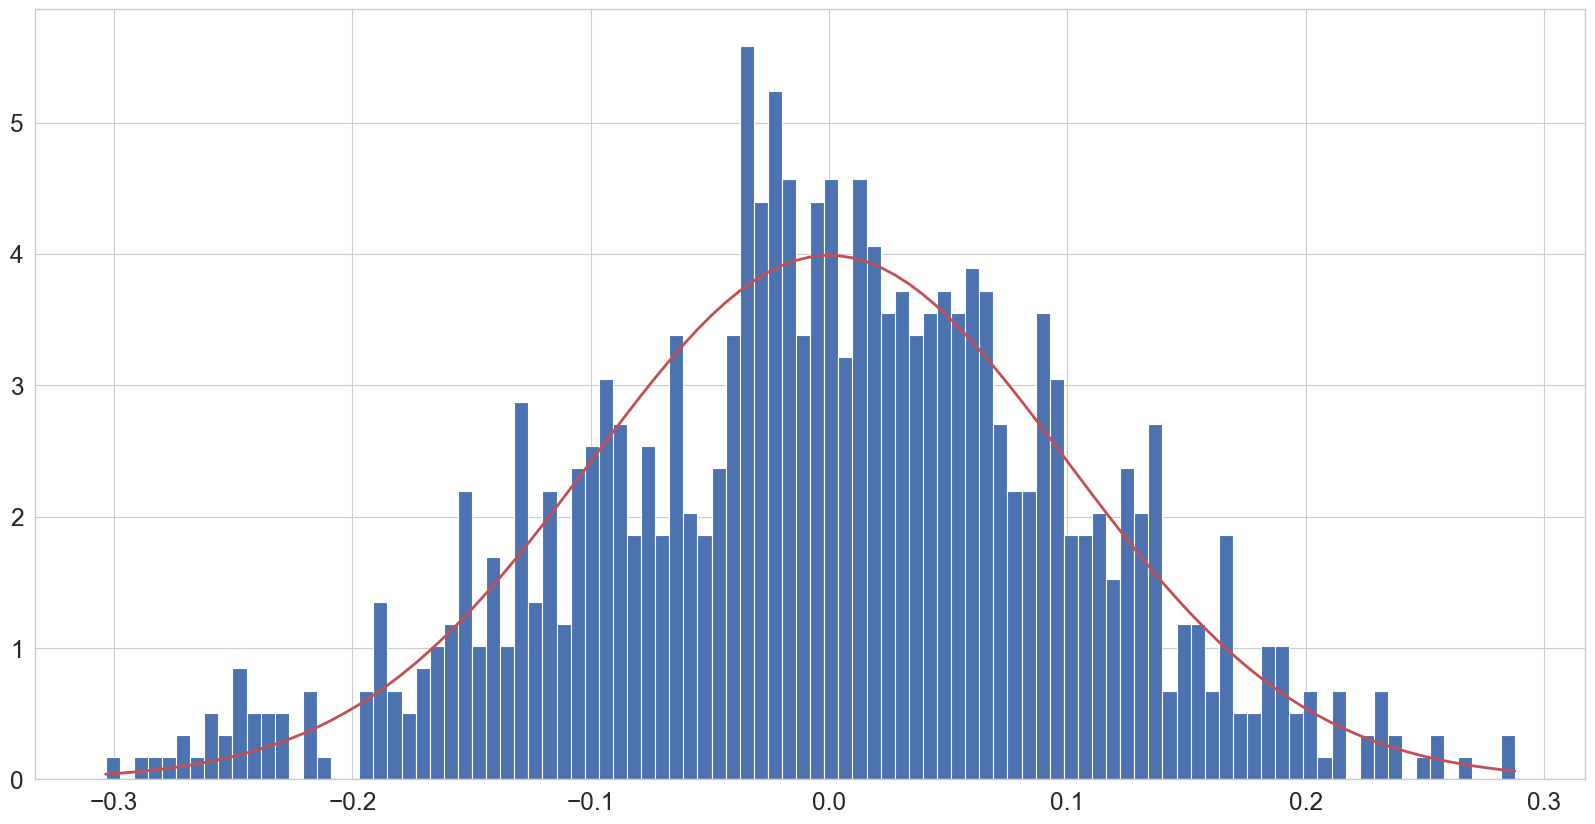

In [254]:
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### Using Sci-py

Creating a normal distribution using sci-py:

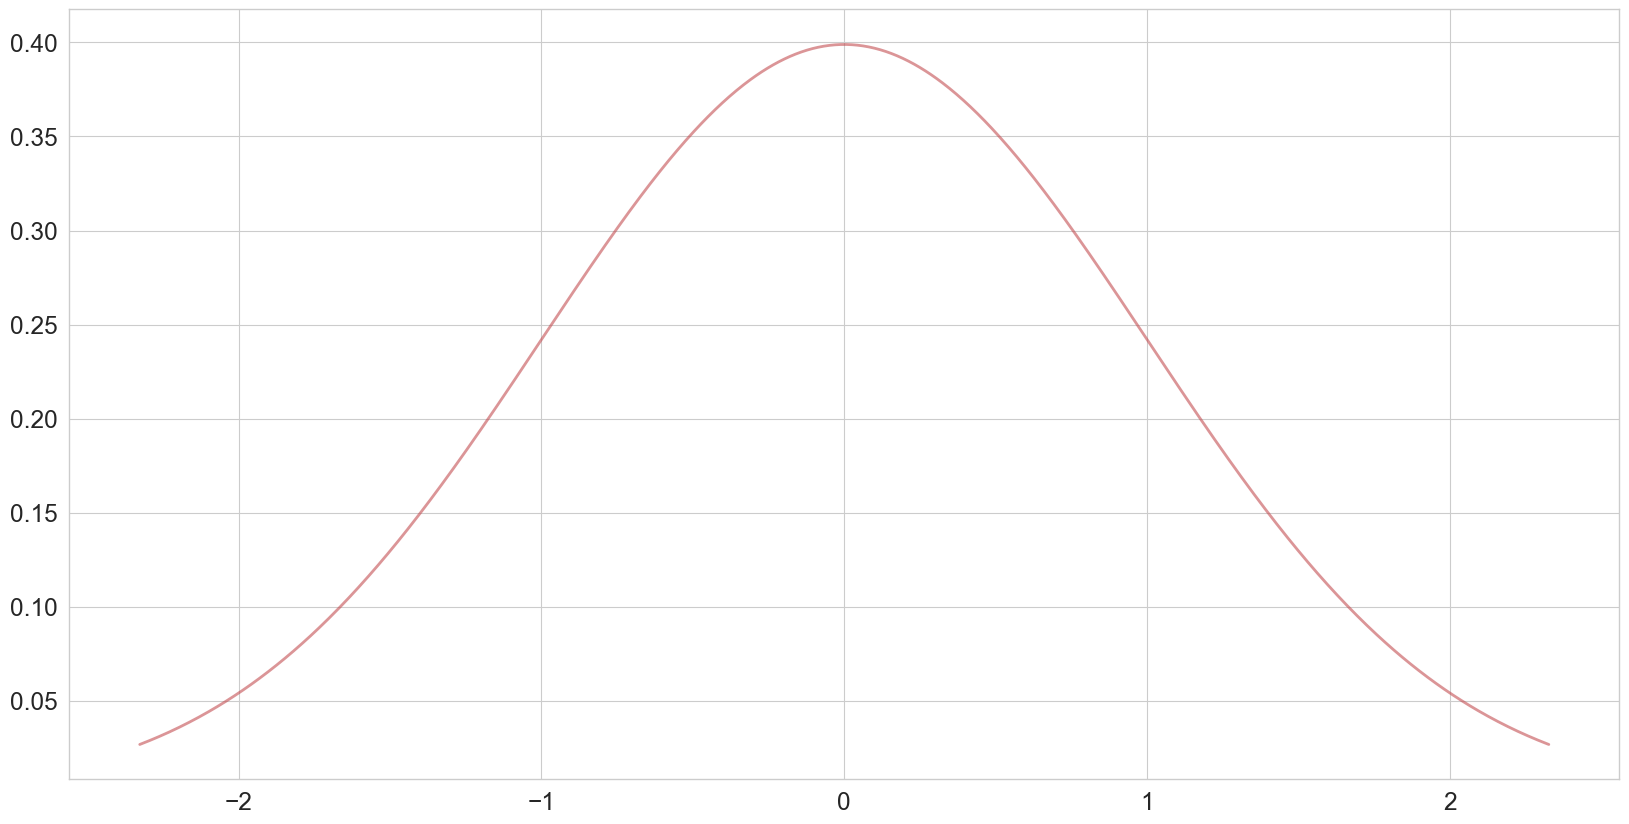

In [256]:
# specify the plot size
fig, ax = plt.subplots(1, 1)

# Calculate the first four moments - note the 'mvsk' letters
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x),
       'r-', lw=2, alpha=0.6, label='norm pdf')

### Multiple Normal Distributions

The normal distributions below have the same means (0) but different standard deviations ranging from 1 to 3.

In [286]:
# Generate range of x values from -10 to 10 in 0.001 steps
x = np.arange(-10, 10, 0.001)

In [311]:
# Generate probability density functions (pdfs with mean of 0, and std from 1 to 3)
x1 = norm.pdf(x, 0, 1)
x2 = norm.pdf(x, 0, 2)
x3 = norm.pdf(x, 0, 3)

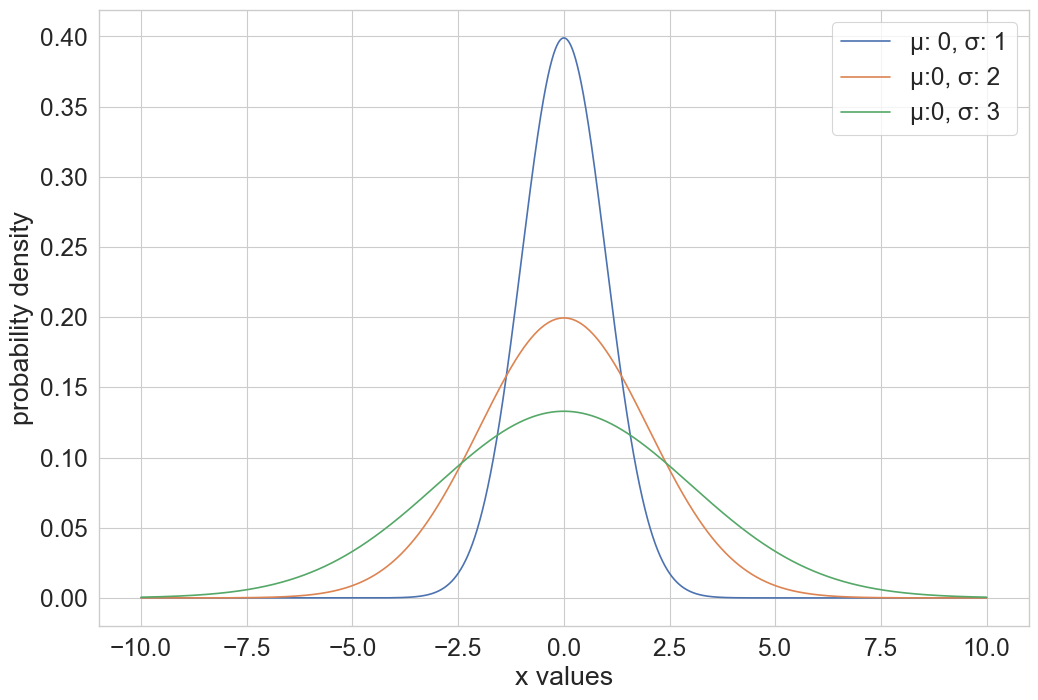

In [312]:
# Set seaborn plot style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 8))

# Input data
ax = sns.lineplot(x = x, y=x1, label='μ: 0, σ: 1')
ax = sns.lineplot(x = x, y=x2, label='μ:0, σ: 2')
ax = sns.lineplot(x = x, y=x3, label='μ:0, σ: 3')

# X and Y axis labels
ax.set(xlabel = "x values", ylabel = "probability density")
# To get rid of the text at top of the graph
plt.show()

So from examining the plots above, the larger standard deviation shows that the data is spread out more.<br>
The plot with a $\mu$ of 0 and $\sigma$ of 1 is known as a *standardised normal distribution*.
<br>
<br>

### Demonstration of Kurtosis

The kurtosis of the three distributions above can be determined either with pandas or with scipy.<br>
Both will be used as a comparison.<br>
Note that a normal distribution will have a kurtosis value of 3;<br>
A *platykurtic* distribution will have a kurtosis value of less than 3 and produce few and less extreme outliers;<br>
A *leptokurtic* distribution will have a kurtosis value of greater than 3 and produce more outliers than a normal distribution.

### standard deviation of 1

In [313]:
# scipy
type(x1)
kurtosis(x1)

3.3954898777247875

In [314]:
# Using pandas
# convert array to dataframe first
df_x1 = pd.DataFrame(data=x1)
df_x1.kurtosis()

0    3.396639
dtype: float64

Using Scipy produces an answer with greater precision, but the conclusion is the same: Leptokurtic kurtosis.

### standard deviation of 2

In [315]:
# scipy
kurtosis(x2)

-0.3107228777512536

In [316]:
# Using pandas
# convert array to dataframe first
df_x2 = pd.DataFrame(data=x2)
df_x2.kurtosis()

0   -0.310501
dtype: float64

Using both Scipy and Pandas shows that the kurtosis is negative - this means that the data has a flatter peak and less data points are on the tails.

### standard deviation of 3

In [318]:
# scipy
kurtosis(x3)

-1.2537543357850855

In [319]:
# Using pandas
# convert array to dataframe first
df_x3 = pd.DataFrame(data=x3)
df_x3.kurtosis()

0   -1.253768
dtype: float64

Both tools show that the kurtosis has an increased negative value - an even flatter peak, that can be confirmed from the plot above.

### Demonstration of Skewness

Skewness is a measure of asymmetry of the distribution relative to the mean.<br>
As the distributions were created to be perfectly symetrical about the mean, it can be expected that the three distributions above (x1, x2 and x3) will have a skewness of 0.<br>

In [325]:
# using scipy
skew(x1)

2.1827406604885127

In [326]:
# Using pandas
df_x1.skew()

0    2.182904
dtype: float64

In [327]:
# using scipy
skew(x2)

1.10936583449355

In [329]:
# using pandas
df_x2.skew()

0    1.109449
dtype: float64

In [328]:
# using scipy
skew(x3)

0.5329708489628868

In [330]:
# using pandas
df_x3.skew()

0    0.533011
dtype: float64

Clearly the skewness is not 0. The calculations will be repeated for real-world data later in this notebook.<br>
Calculations from [this website](https://corporatefinanceinstitute.com/resources/data-science/skewness/) will be used to test, using Pearson mode skewness and Pearson median skewness.

**Pearson mode skewness**<br>
$skewness = \frac{\overline{X} - M_0}{s}$


**Pearson median skewness**<br>
$skewness = \frac{3\overline{X} - M_d}{s}$

<br>

Where:
- $X$ = mean value
- $M_0$ = Mode value
- $s$ = standard deviation of sample
- $M_d$ = median value

In [351]:
# Pearson mode skewness

In [355]:
df_x1.median()

0    0.000001
dtype: float64

In [345]:
df_x1.mean()
df_x1.mode()
df_x1.std()
skewness_x1 = (df_x1.mean() - df_x1.mode()) / df_x1.std()
skewness_x1

,0
0,0.464132
1,0.464132
2,0.464132
3,0.464132
4,0.464132
...,...
19995,-3.239098
19996,-3.239098
19997,-3.239103
19998,-3.239103


In [362]:
# Pearson median skewness
skewness_x1_2 = ((3 * df_x1.mean()) - df_x1.median()) / df_x1.std()
skewness_x1_2

0    1.392382
dtype: float64

So using the Pearson median skewness calculation gives a different value to scipy's default calculation.<br>
Use a skewtest to determine 

In [395]:
# Run skewtest on x1
skewtest(x1, alternative='two-sided')

SkewtestResult(statistic=80.64852665760256, pvalue=0.0)

The [skewtest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest) returns a z-score and a p-value.<br>
It shows that because the p value is 0, there is no skewness.<br>

The skewtest can be repeated for *x1* and *x2* before using scipy and doing the calculation manually.

In [369]:
# Skew test for second distribution with a standard deviation of 2
skewtest(x2, alternative='two-sided')

SkewtestResult(statistic=52.52978401675922, pvalue=0.0)

In [370]:
# Skew test for third distribution with a standard deviation of 3
skewtest(x3, alternative='two-sided')

SkewtestResult(statistic=28.934755489995553, pvalue=4.3648933561556917e-184)

The skew tests confirm that the distributions are not skewed.

In [371]:
# pandas
df_x2.skew()

0    1.109449
dtype: float64

In [372]:
# scipy
skew(x2)

1.10936583449355

In [375]:
# Pearson median calculations for x2
df_x2.mean()
df_x2.mode()
df_x2.std()
skewness_x2 = ((3 * df_x2.mean()) - df_x2.median()) / df_x2.std()
skewness_x2

0    2.09322
dtype: float64

In [376]:
# pandas
df_x3.skew()

0    0.533011
dtype: float64

In [377]:
# scipy
skew(x3)

0.5329708489628868

The calculations will be repeated later in this notebook for a variable taken from a real dataset.

## The empirical rule

The empirical rule is also known as *the three-sigma rule* or *68-95-99.7 rule*.
This rule states that statistically, for a normal distribution, the majority of the data under observation will fall within three standard deviations.
- 68% of data observed will fall in the first standard deviation;
- 95% of data observed will fall in the first two standard deviations;
- 99.7% of data observed will fall in the first three standard deviations.

The empirical rule can be used as a way to test how 'normal' a distribution is - i.e. if it looks like a bell curve, but when analysed further, isn't a perfect normal distribution.
Outliers can also be found when using the empirical rule, especially if 99.7% of data falls within three standard deviations.

The probability density function of the normal distribution is:

$p(x)$ = $\frac{1}{\sqrt{2\pi\sigma^2}}e^-\frac{(x-\mu)^2}{2\sigma}$

Where:<br>
$x$ is the data under consideration;<br>
$p(x)$ is the probability function;<br>
$\mu$ is the *mean*;<br>
$\sigma$ is the *standard deviation*.

## The Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that when many independent variables are summed up, the *normalised* sum tends towards a normal distribution even if the original variables themselves aren't normally distributed.

This is regarded as a fundamental concept in probability theory because it infers that probabilistic and statistical methods that can be applied to normal distributions can also be applied to other problems that involve other types of probability distributions.

This can be defined mathematically as follows:


The mean of the sampling distribution will be equal to the mean of the population distribution:<br>

$$\mu{_{\overline{x}}} = \mu$$

The variance of the sampling distribution will be equal to the variance of the population distribution, divided by sample size:
<br>


$${\sigma_{\overline x}}^2 = \frac{\sigma^2}{n}$$




### Standard Error

From the above, the *standard error* can be obtained by solving for $\sigma{_{\overline{x}}}$, where $n$ is the sample size.

$$\sigma{_{\overline{x}}} = \frac{\sigma}{\sqrt{n}} $$

<br>

The *standard error* of a statistic is the standard deviation $\sigma$ of a sample distribution, where the sample distribution of the population mean is generated by repeatedly sampling and noting the means.<br>
These means will then form a distribution  - note that this distribution will have it's own mean $\mu$ and standard deviation $\sigma$.<br>

As the sample size increases, the sample means gets closer to the population mean.

## Real-world data

For this, a dataset from the UCI Machine Learning Repository will be used - The [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

### Check folder

In [2]:
# Print out what's in the same folder as this notebook. 
# 'dataset' should be a folder in there, and within that, the wisconsin breast cancer dataset.
print(os.listdir("../project"))

['.ipynb_checkpoints', 'dataset', 'Normal-Distribution-Project.ipynb']


### Import dataset

In [3]:
# Import the dataset and list variables.
df = pd.read_csv("../project/dataset/wisconsin.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Basic statistics of a variable

In [4]:
# Look at one variable - 'smoothness mean' of the tumours recorded.
df_sm = df['smoothness_mean']
# Looking the statisc of 'smoothness mean'
df_sm.describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

In [5]:
# Look at the mean of the smoothness mean
df_sm.mean()

0.096360281195079

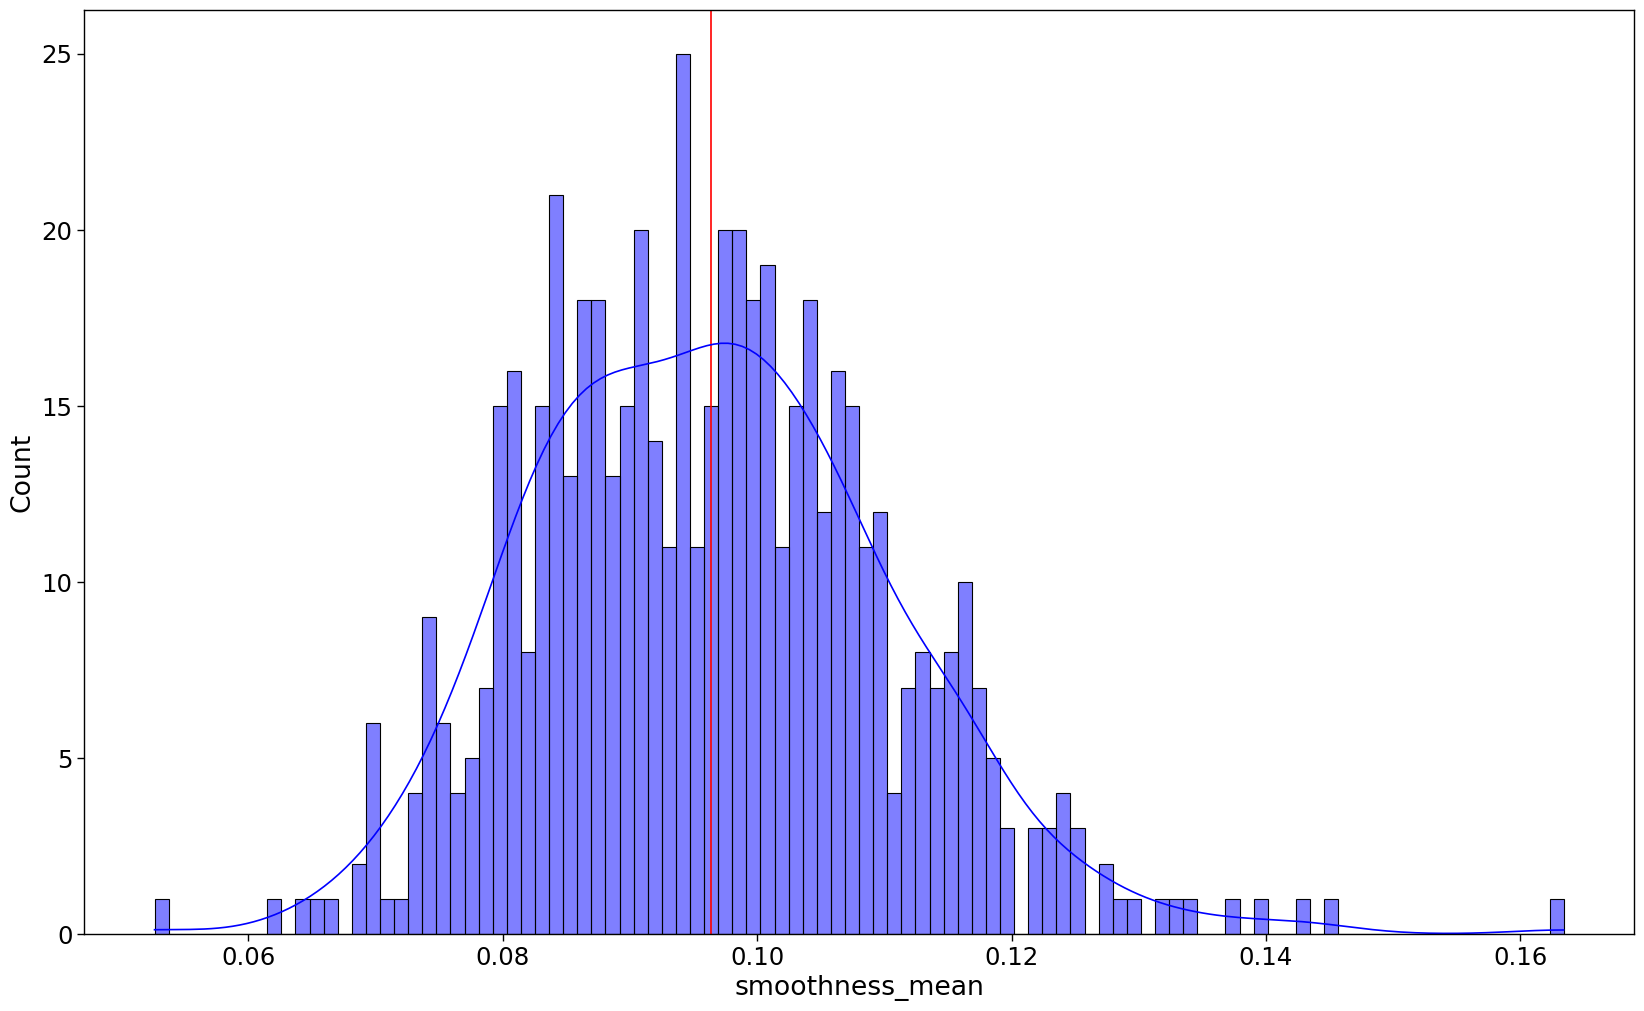

In [6]:
# Plot the variable 'smoothness_mean' with a vertical red line for the mean.
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
plt.axvline(x=df_sm.mean(),color='r')
sns.histplot(df['smoothness_mean'],color='blue', bins=100, kde=True)
plt.show()

## Kurtosis of data using Pandas and Scipy

Kurtosis is a measure of how 'fat' the tails are in a distribution.<br>
The higher the value for kurtosis, the wider the tails are.<br>
A negative value for kurtosis would indicate that the majority of data points are grouped closely around the mean with few outliers.

In [380]:
# Kurtosis using pandas
df_sm.kurtosis()

0.8559749303632245

In [381]:
# Kurtosis using scipy stats
kurtosis(df_sm)

0.837945350265711

it can be seen that there's some disparity in the kurtosis results between pandas and scipy.<br>
[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html) uses Fisher's definition of kurtosis, whereas scipy can use either Fisher's or Pearson's definition of kurtosis.<br>

From the reference documents, scipy has a boolean option to correct the calculation for statistical bias.

### Correction for statistical bias

In [384]:
# Correct for statistical bias
kurtosis(df_sm, bias=False)

0.8559749303632245

So it can be seen that the scipy calculation is exactly the same as the pandas calculation when corrected for statistical bias.

### Normalise data and recalculate

In [388]:
## Normalise data about 0
x = (df_sm - df_sm.mean()) / df_sm.std()
x

0      1.567087
1     -0.826235
2      0.941382
3      3.280667
4      0.280125
         ...   
564    1.040926
565    0.102368
566   -0.839745
567    1.524426
568   -3.109349
Name: smoothness_mean, Length: 569, dtype: float64

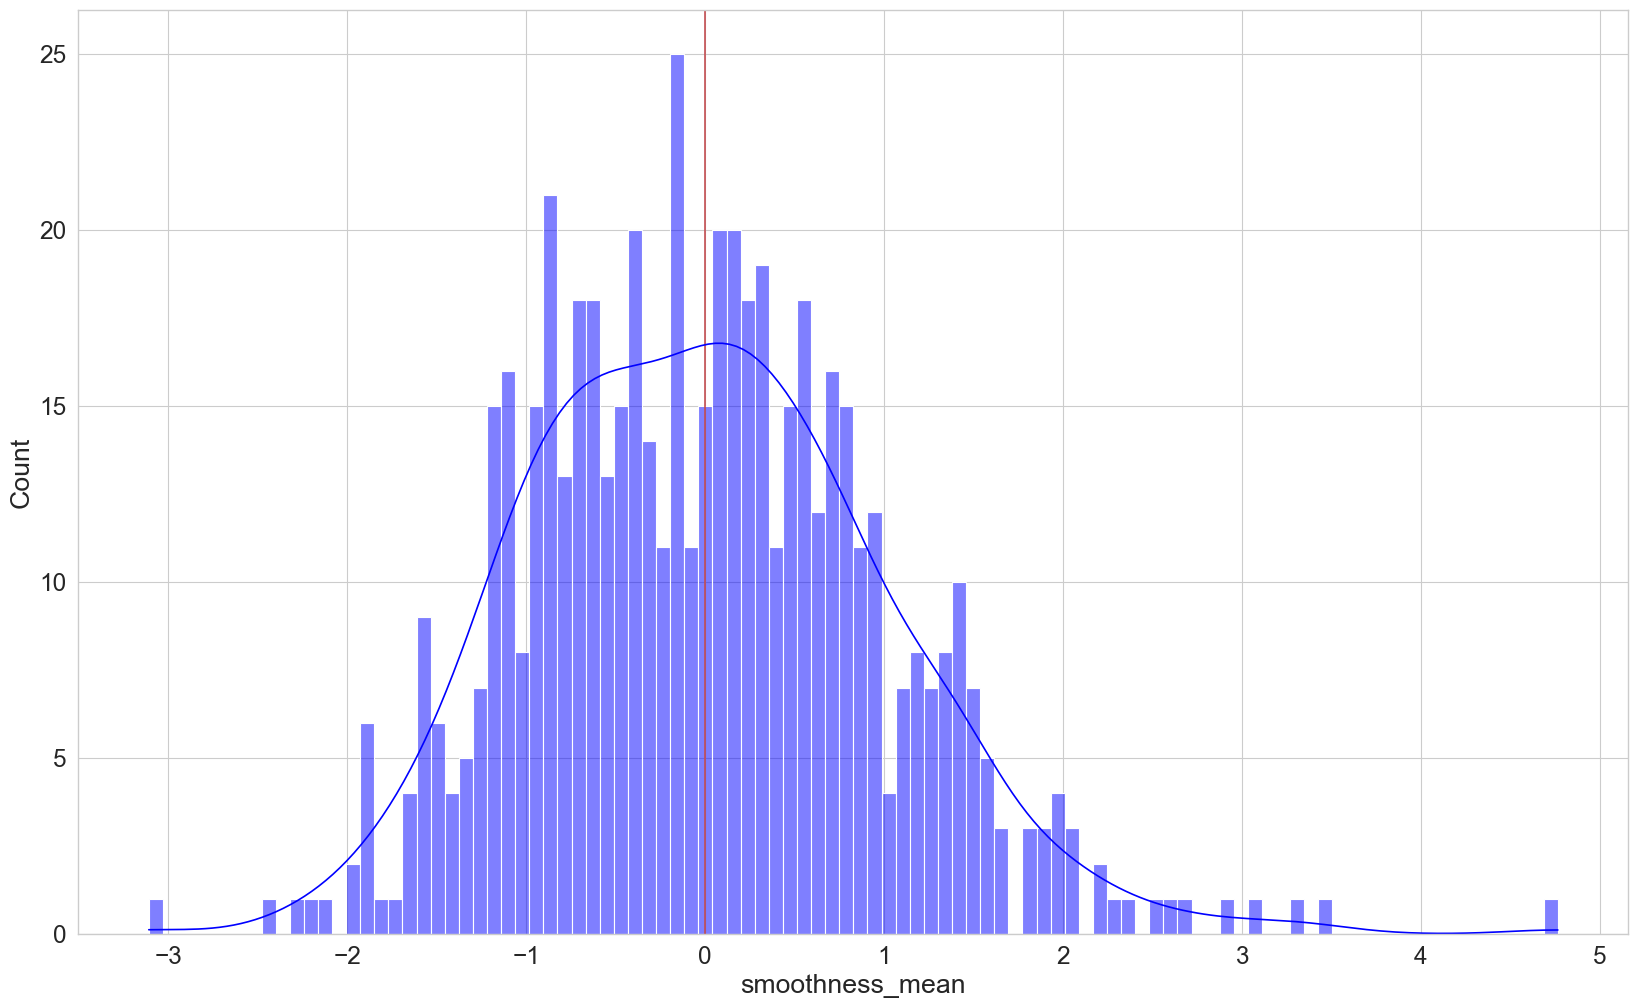

In [389]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
# Left vertical line for consistency, but mean is 0.
plt.axvline(x=x.mean(),color='r')
sns.histplot(x,color='blue', bins=100, kde=True)
plt.show()

In [390]:
# pandas
x.kurtosis()

0.8559749303632262

In [392]:
# scipy
kurtosis(x, bias=False)

0.8559749303632267

So normalising the data about 0 has no effect on the calculations for kurtosis.

## Skewness of data using pandas and scipy

In [396]:
# Run a skew test on input variable
skewtest(df_sm)

SkewtestResult(statistic=4.2907750004655325, pvalue=1.78050645019981e-05)

In [398]:
# Pandas 
df_sm.skew()

0.45632376481955844

In [397]:
# Scipy
skew(df_sm)

0.4551199203571718

Both tools show that the variable is slightly positively skewed. This should indicate that:
- The mean ($\mu$) is greater than the median<br>
- The mode occurs at the highest frequency.<br>

This can be confirmed or disproven using pandas: <br>

In [403]:
print(f'The mean value is: {df_sm.mean()}')
print(f'The median value is: {df_sm.median()}')
print(f'The mode is: {df_sm.mode()}')

The mean value is: 0.096360281195079
The median value is: 0.09587
The mode is: 0    0.1007
Name: smoothness_mean, dtype: float64


So the mean is indeed higher than the median, just, and the value for the mode has also been determined.<br>
The variable data can be re-plotted with these values.

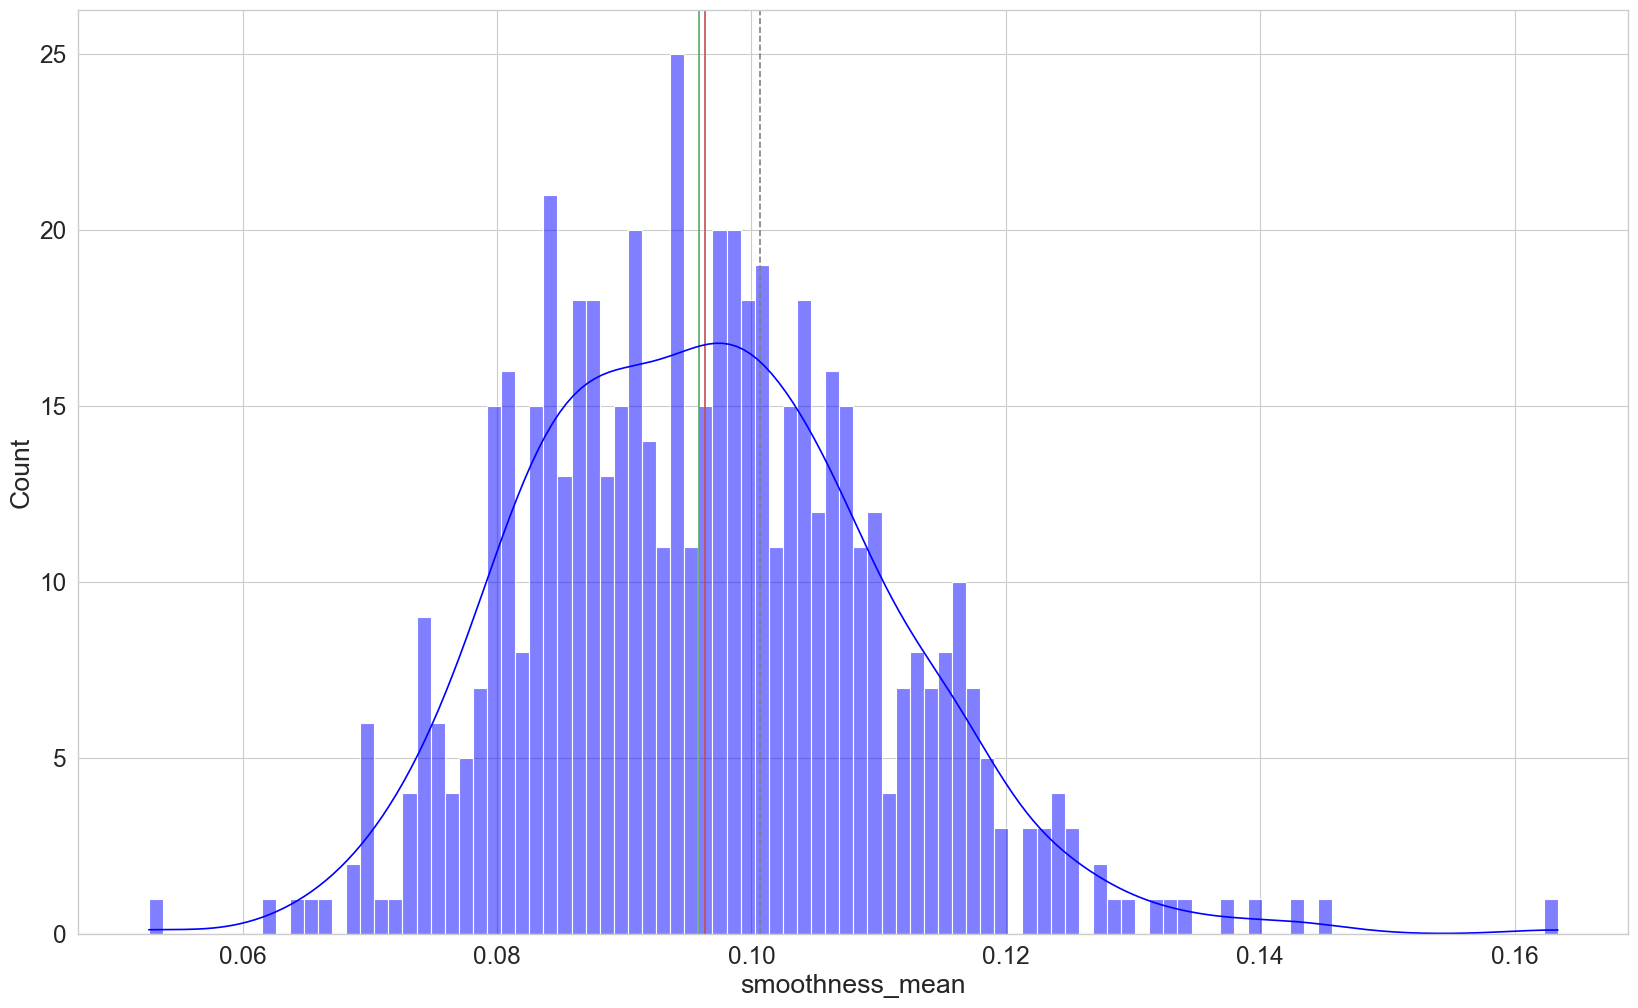

In [414]:
# Plot the variable 'smoothness_mean' with a vertical red line for the mean.
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
# Plot the mean
plt.axvline(x=df_sm.mean(),color='r')
# Plot the median
plt.axvline(x=df_sm.median(), color='g')
# Plot the mode
plt.axvline(x=0.1007, color='gray', linestyle='dashed')
sns.histplot(df['smoothness_mean'],color='blue', bins=100, kde=True)
plt.show()

In this case, plotting the data with the kernel density estimation (kde) was a good indicator for how normal the distribution was and whether it was skewed - note the slight 'bump' at the top of the plot that corresponds to the value for the mode.

## The central limit theorem: real world data

### Mean of sample size

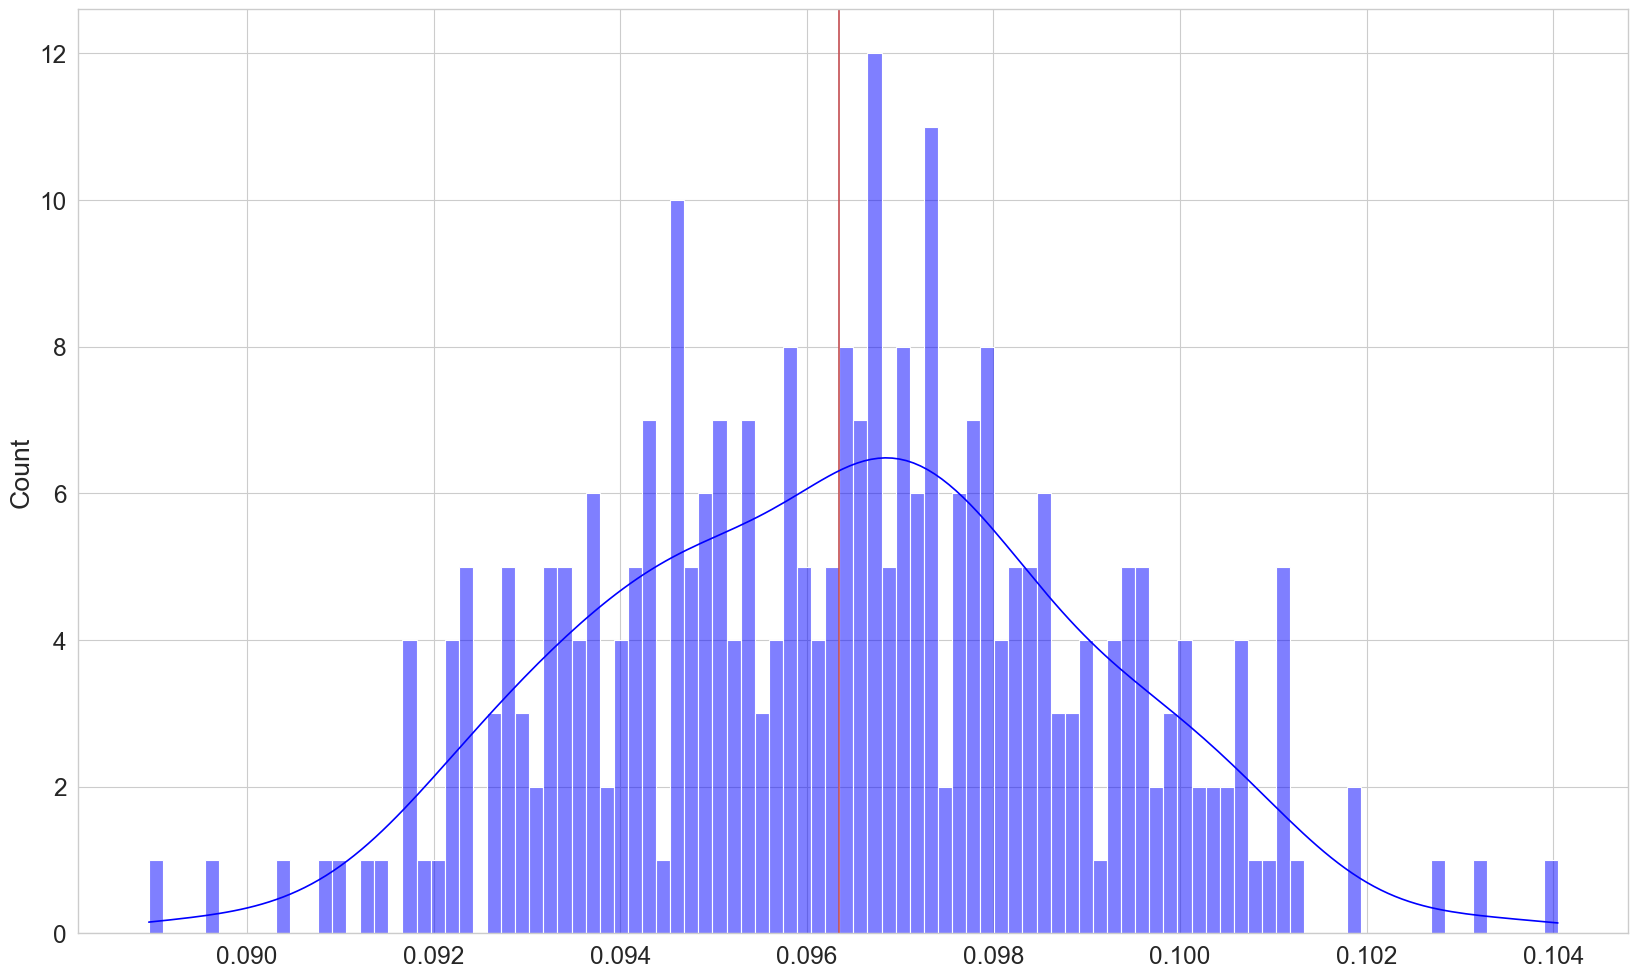

0.09634890523968784


In [415]:
# Take sample size=10, samples=300
# Calculate mean and plot the mean of sample 300 times

array = []
n = 300
for i in range(1,n):
    array.append(df_sm.sample(n=30,replace= True).mean())

sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
plt.axvline(x=np.mean(array),color='r') # for giving mean line
sns.histplot(array,color='blue', bins=100, kde=True)
plt.show()

# Print the mean of the array
print(np.mean(array))

So from the large amount of samples, the mean is very close the mean of the variable itself.<br>
Now the sample size will increase to see how the mean of the sample size approaches the mean of the population data (the variable 'smoothness_mean' in this case).

### Mean of different sample sizes

The mean of array 1 (sample size = 30) is: 0.09609833890746934
The mean of array 2 (sample size = 60) is: 0.09621977257525084
The mean of array 3 (sample size = 120) is: 0.09648956772575251
The mean of array 4 (sample size = 240) is: 0.09644478971571907


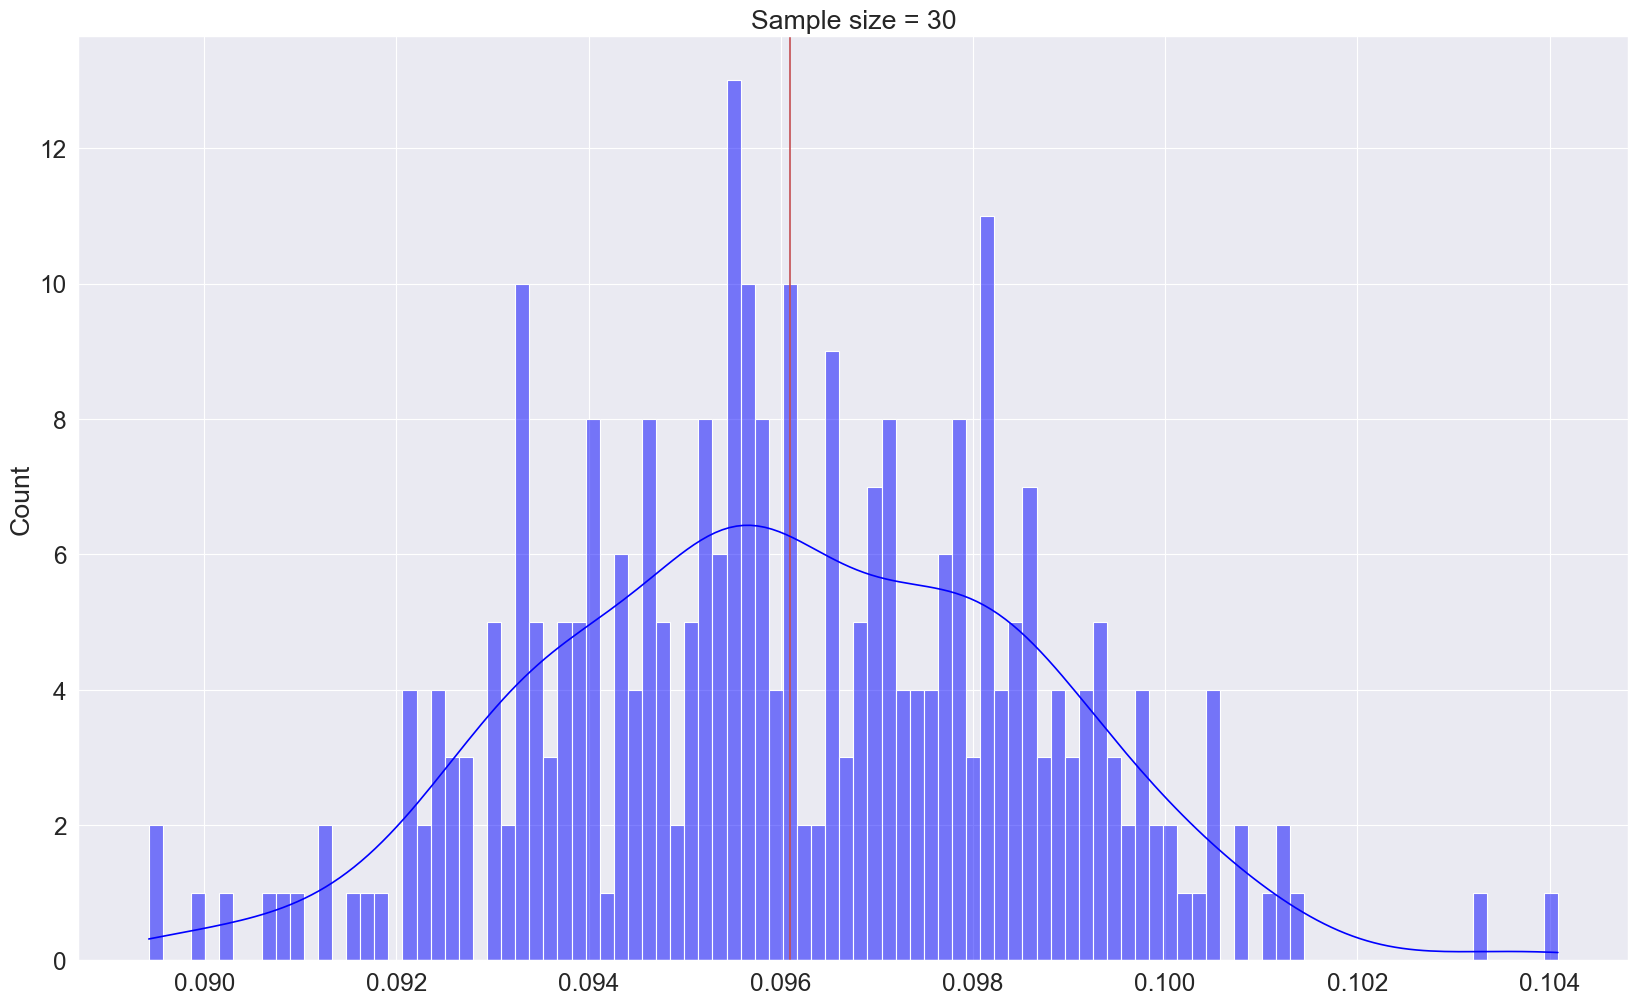

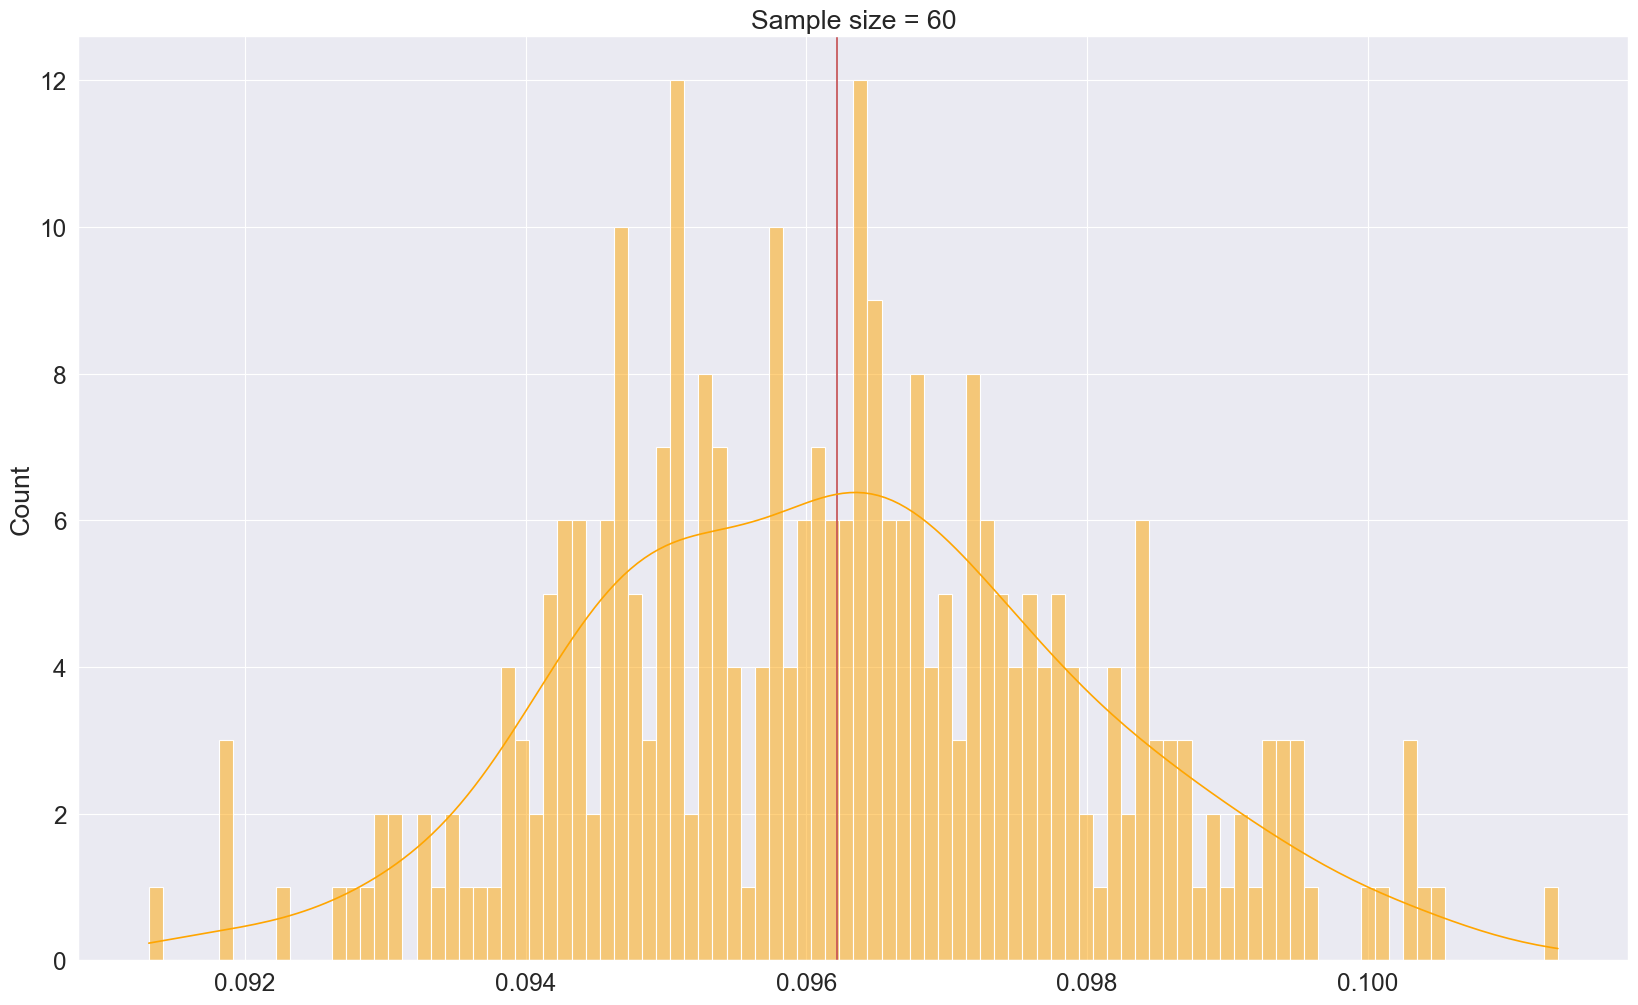

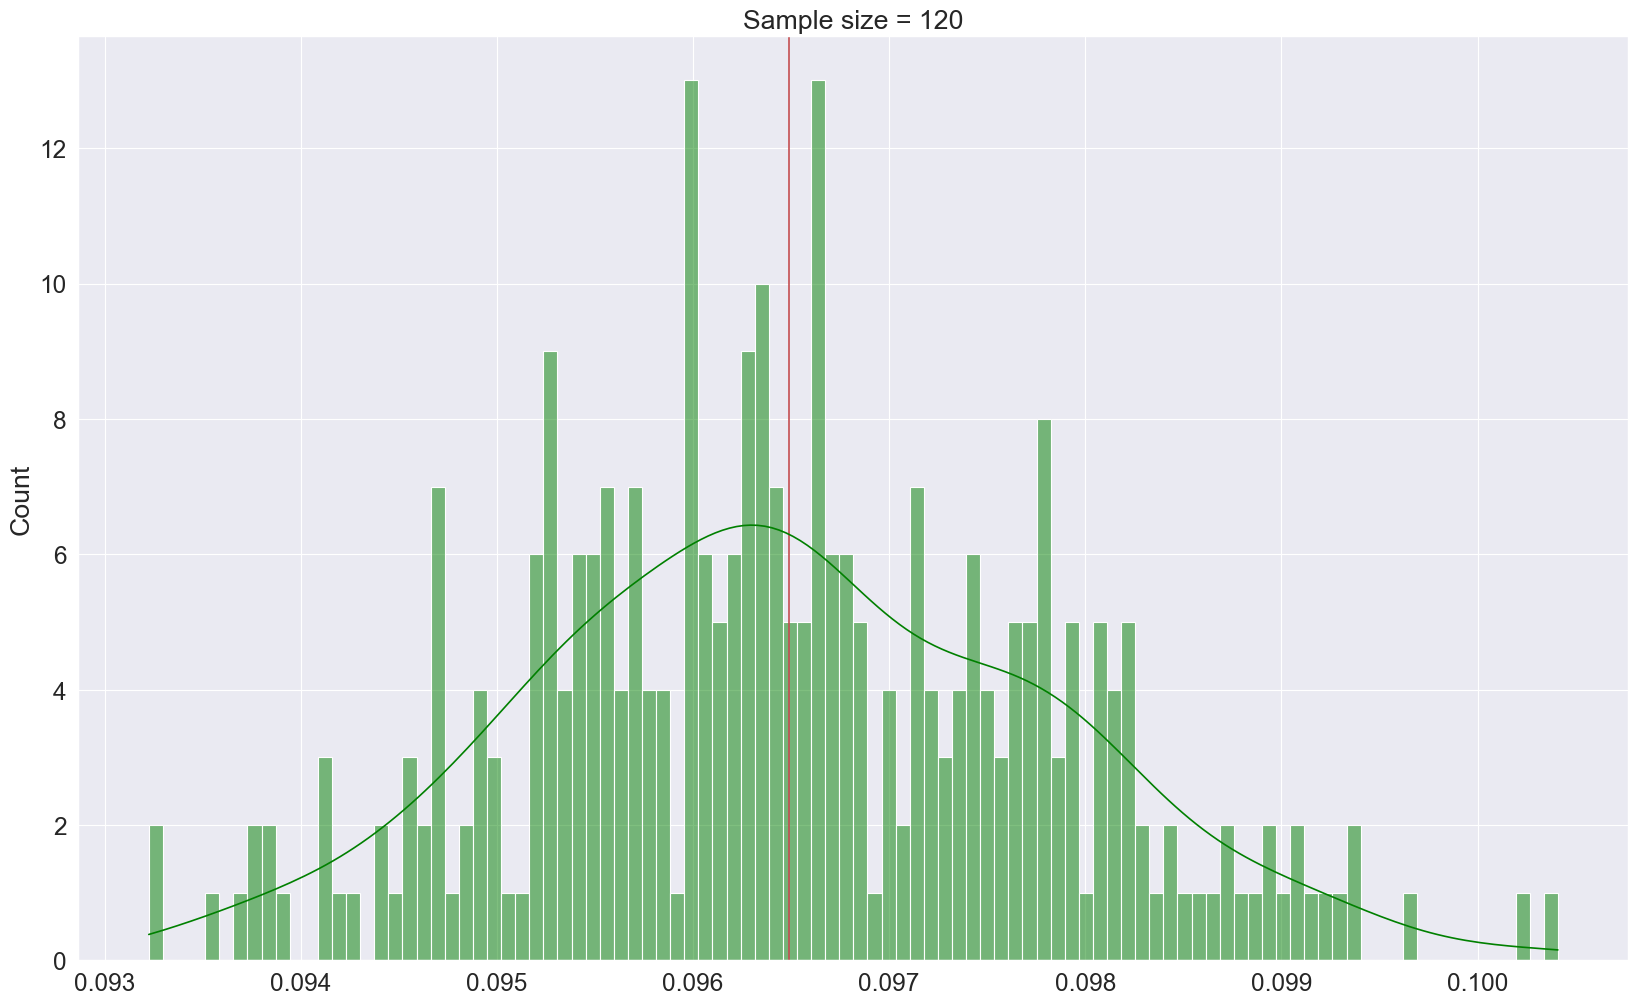

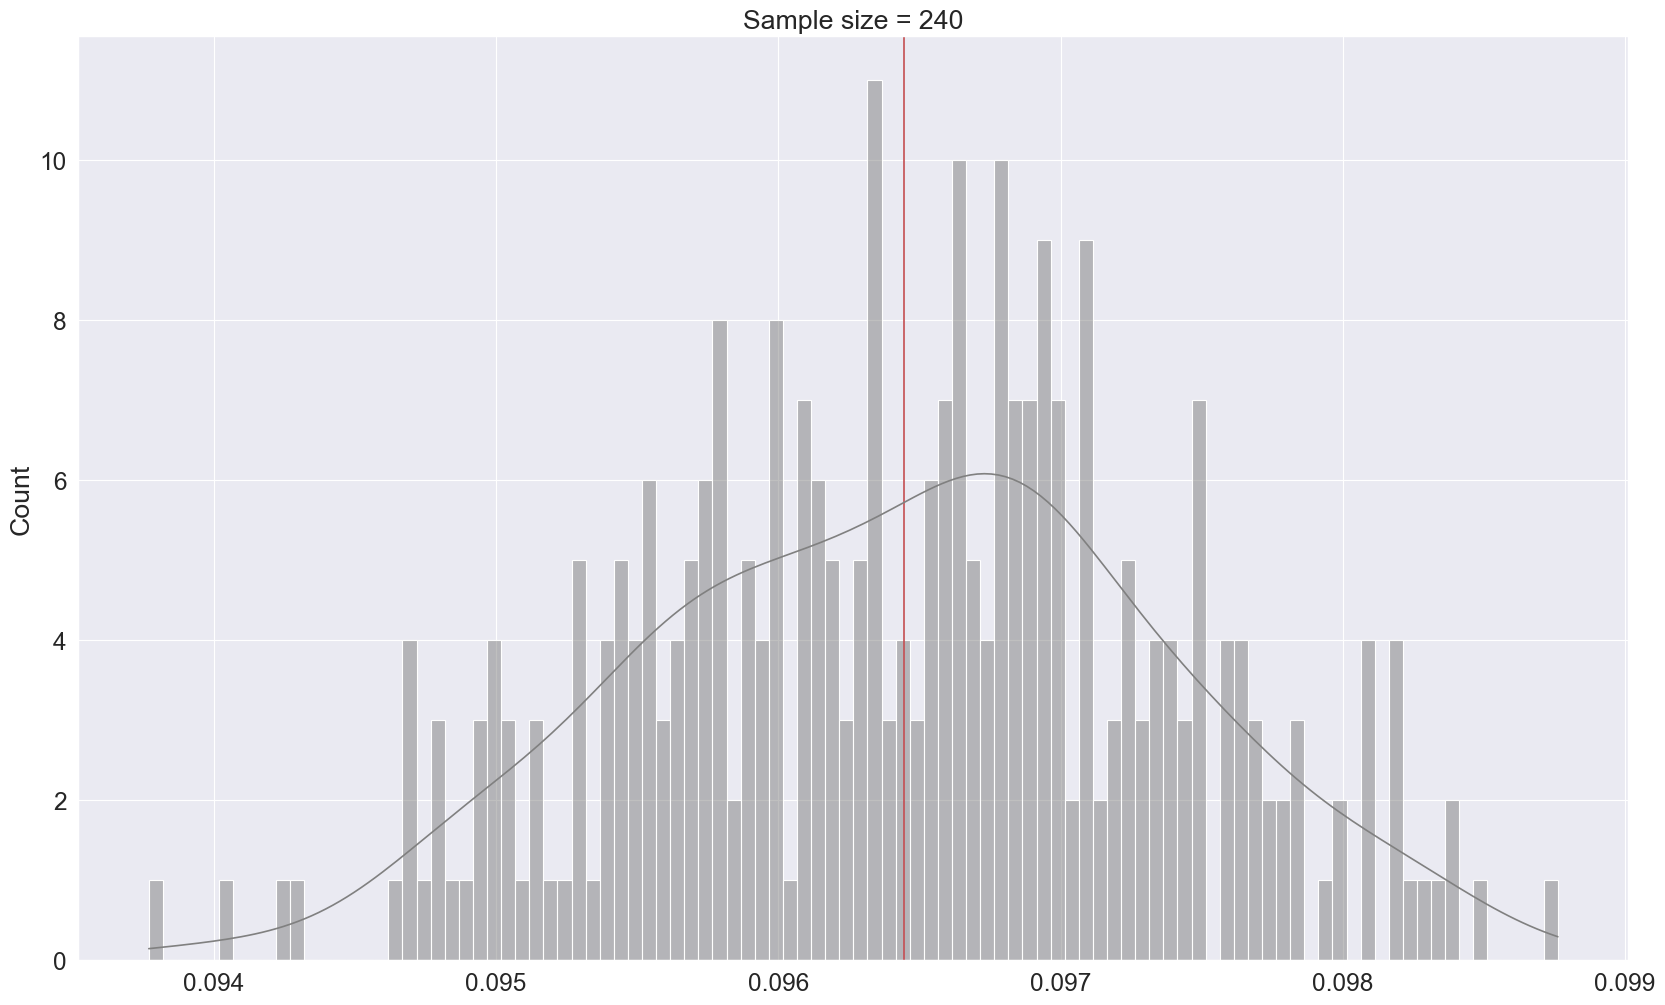

In [93]:
# Trying to get multiple plots in seaborn
array1 = []
array2 = []
array3 = []
array4 = []
n = 300
for i in range(1,n):
    array1.append(df_sm.sample(n=30,replace= True).mean())
    array2.append(df_sm.sample(n=60,replace= True).mean())
    array3.append(df_sm.sample(n=120,replace= True).mean())
    array4.append(df_sm.sample(n=240,replace= True).mean())

# Set figure size
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
if len(array1):
    #sns.set_context("paper", font_scale=2)
    #plt.figure(figsize=(20, 12))
    # the mean line
    plt.axvline(x=np.mean(array1),color='r') 
    sns.histplot(array1,color='blue',bins=100, kde=True).set(title="Sample size = 30")
    print(f'The mean of array 1 (sample size = 30) is: {np.mean(array1)}')

if len(array2):
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 12))
    # the mean line
    plt.axvline(x=np.mean(array2),color='r') 
    sns.histplot(array2, color='orange',bins=100, kde=True).set(title="Sample size = 60")
    print(f'The mean of array 2 (sample size = 60) is: {np.mean(array2)}')

if len(array3):
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 12))
    # the mean line
    plt.axvline(x=np.mean(array3),color='r') 
    sns.histplot(array3, color='green',bins=100, kde=True).set(title="Sample size = 120")
    print(f'The mean of array 3 (sample size = 120) is: {np.mean(array3)}')

if len(array4):
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 12))
    # the mean line
    plt.axvline(x=np.mean(array4),color='r') 
    sns.histplot(array4, color='gray',bins=100, kde=True).set(title="Sample size = 240")
    print(f'The mean of array 4 (sample size = 240) is: {np.mean(array4)}')


So as the sample size increases, the sample mean approaches the mean of the population mean (the 'smoothness_mean' variable in this case).

To recap:<br>
- A dataset (well studied) was chosen and a variable within that dataset was plotted.
- The variable was found to have a normal distribution
- The mean of the variable was found (population mean)
- various sample sizes were taken and compared with the population mean
- As sample size increases, the sample mean can be approximated with the population mean.

## Proof of the Empirical rule

Continuing to use the variable from the breast cancer dataset, the Empirical rule can be used to estimate the variables spread.
To recap:
- 68.26% of the variable's data falls within one standard deviation of the mean ($\mu \pm1\sigma$)
- 95.44% of the variable's data falls within two standard deviations of the mean ($\mu \pm2\sigma$)
- 99.7% of the variable's data falls within three standard deviations of the mean ($\mu \pm3\sigma$)

<br>


To work through the empirical rule, there can be a recap of the data and then variables for $\mu \pm1\sigma$, $\mu \pm2\sigma$ and $\mu \pm3\sigma$ can be created so calculations are easier to work with.
The plot of the variable data can then be plotted again ('smoothness_mean') with the above variables added to it.

<br>
After plotting the vertical lines for the standard deviations, pandas can be used to count the data from the mean to ($\pm1\sigma$) to see whether the empirical rule is a good example of the variable.

### Recap of data

In [99]:
# Basic statistics of the variable 'smoothness_mean'
df_sm.describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

In [98]:
# Get the standard deviation again.
df_sm.std()

0.014064128137673616

### Standard deviations about the mean

Create variables for the standard deviations about the mean and display the values.<br>
The variables will be later used to plot the standard deviations with the original data.                                                                                     

In [177]:
# Create variables to plot:
# 1sd, 2sd, 3sd 
one_sd = df_sm.std() + df_sm.mean()
print(f'The mean + 1 standard deviation is: {one_sd}')

one_sd_minus = df_sm.mean() - df_sm.std()
print(f'The mean - 1 standard deviation is: {one_sd_minus}')

two_sd = (2 * df_sm.std()) + df_sm.mean()
print(f'\nThe mean + 2 standard deviations is: {two_sd}')

two_sd_minus = df_sm.mean() - (2 * df_sm.std())
print(f'The mean - 2 standard deviations is: {two_sd_minus}')

three_sd = (3 * df_sm.std()) + df_sm.mean()
print(f'\nThe mean + 3 standard deviations is: {three_sd}')
three_sd_minus = df_sm.mean() - (3 * df_sm.std())
print(f'The mean - 3 standard deviations is: {three_sd_minus}')

The mean + 1 standard deviation is: 0.11042440933275262
The mean - 1 standard deviation is: 0.08229615305740538

The mean + 2 standard deviations is: 0.12448853747042624
The mean - 2 standard deviations is: 0.06823202491973177

The mean + 3 standard deviations is: 0.13855266560809984
The mean - 3 standard deviations is: 0.054167896782058154


### Plot the standard deviations

The standard deviations will be plotted against the original data as follows:<br>
- ($\mu \pm1\sigma$)
- ($\mu \pm2\sigma$)
- ($\mu \pm3\sigma$)
<br>

Where ($\mu +1\sigma$) up to ($\mu +3\sigma$) will have solid lines and<br>
($\mu -1\sigma$) up to ($\mu -3\sigma$) will have dashed lines.<br>

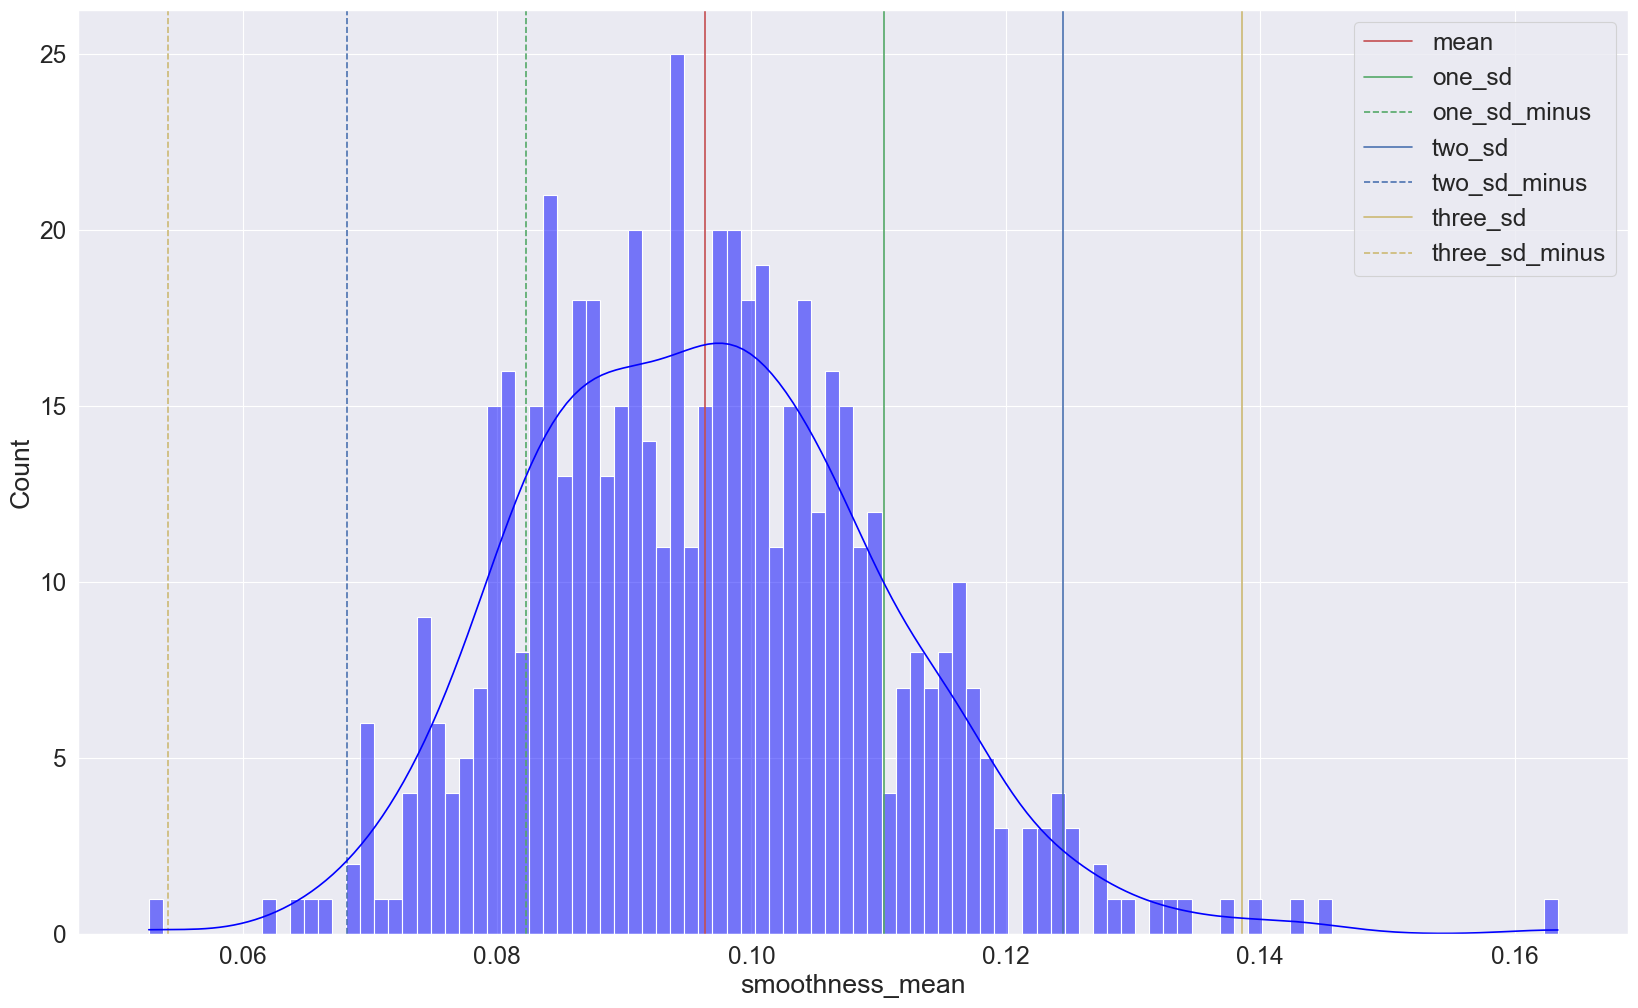

In [178]:
# Dashed lines are the standard deviations away from the mean.
# Plot the variable 'smoothness_mean' with a vertical red line for the mean.
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(20, 12))
# Plot the mean
plt.axvline(x=df_sm.mean(),color='r')
# Plot 1 sd away from mean
plt.axvline(x=one_sd,color='g')
plt.axvline(x=one_sd_minus,color='g', linestyle='dashed')

# Plot 2 sd away from mean
plt.axvline(x=two_sd,color='b')
plt.axvline(x=two_sd_minus,color='b', linestyle='dashed')

# Plot 3 sd away from mean
plt.axvline(x=three_sd,color='y')
plt.axvline(x=three_sd_minus,color='y', linestyle='dashed')

# Plot histogram
sns.histplot(df['smoothness_mean'],color='blue', bins=100, kde=True)
plt.legend(labels=["mean", "one_sd", "one_sd_minus", "two_sd", "two_sd_minus", "three_sd", "three_sd_minus"])
#plt.legend(True)
plt.show()

Now count the values from the mean to the first standard deviation, either way from the mean.<br>
From looking at the graph, there actually appears to be a higher number of values between $\mu -1\sigma$ and  $\mu -2\sigma$ <br>
Let the calculations confirm or disprove.

### Confirmation of Empirical rule

Now work through each standard deviation and see whether the following is true:<br>
- 68.26% of the data falls within ($\mu \pm1\sigma$)  
- 95.44% of the data falls within ($\mu \pm2\sigma$)
- 99.7% of the data falls within ($\mu \pm3\sigma$)

Although the figures above are for a *perfect* normal distribution, where the data is symetrical about the mean, and real-world data is being analysed.

The process will be:
- Count the data for each standard deviation away from the mean, both positive and negative;
- Calculate the percentage of the data between the mean and standard deviation;
- See how it compares to the empirical rule.

### One standard deviation

In [203]:
# Count from mean + 1 sd
count_one_sd = df_sm[(df_sm > df_sm.mean()) & (df_sm < one_sd)].count()
print(f'Count of mean to +1 standard deviation: {count_one_sd}')

Count of mean to +1 standard deviation: 196


In [194]:
# Get the percentage to see how much of the data falls within plus/minus 1 sd of the mean
one_sigma = ((count_one_sd / df_sm.count()) * 100)
print(f'{one_sigma:.4f}')

34.4464


In [205]:
# count from mean - 1 sd
count_one_sd_minus = df_sm[(df_sm > one_sd_minus) & (df_sm < df_sm.mean())].count()
print(f'Count of (mean - 1 standard deviation) to mean: {count_one_sd_minus}')

Count of (mean - 1 standard deviation) to mean: 200


In [217]:
# percentage of -1 sigma
one_sigma_minus = ((count_one_sd_minus / df_sm.count()) * 100)
print(f'{one_sigma_minus:.4f}')

35.1494


In [218]:
# Add (mean + 1sd) and (mean - 1sd) to see wether it matches empirical rule.
print(f'Total percentage for plus/minus one standard deviation from the mean: {one_sigma + one_sigma_minus:.4f}%')

Total percentage for plus/minus one standard deviation from the mean: 69.5958%


So 69.6% versus 68.26% for the empirical rule. Good enough to proceed with the calculation for the count between the mean and the second standard deviation.

### Two Standard deviations

In [226]:
# Count the value from the first standard deviation to the second standard deviation
count_two_sd = df_sm[(df_sm > df_sm.mean() + df_sm.std()) & (df_sm < two_sd)].count()
print(f'The count from the first standard deviation to the second standard deviation: {count_two_sd}')

The count from the first standard deviation to the second standard deviation: 69


In [227]:
# Count the value from (mean - 2sd) to mean - 1sd
#count_one_sd_minus = df_sm[(df_sm > one_sd_minus) & (df_sm < df_sm.mean())].count()
count_two_sd_minus = df_sm[(df_sm > two_sd_minus) & (df_sm < one_sd_minus)].count()
count_two_sd_minus
print(f'The count from (mean - 2 sd) to (mean - 1 sd): {count_two_sd_minus}')

The count from (mean - 2 sd) to (mean - 1 sd): 84


In [228]:
# Get the percentage value of the count between the first and second standard deviation.
two_sigma = ((count_two_sd / df_sm.count()) * 100)
print(f'{two_sigma:.4f}%')

12.1265%


In [229]:
# Get the percentage of the count between the second and first standard deviation
two_sigma_minus = ((count_two_sd_minus / df_sm.count()) * 100)
print(f'{two_sigma_minus:.4f}%')

14.7627%


In [234]:
# Add the values for one_sigma and two_sigma together to see whether data conforms to the empirical rule.
print(f'Positive two standard deviations: {one_sigma + two_sigma:.4f}%')
print(f'Negative two standard deviations: {one_sigma_minus + two_sigma_minus:.4f}%')
print(f'\nTotal positive and negative: {one_sigma + two_sigma + one_sigma_minus + two_sigma_minus:.4f}%')

Positive two standard deviations: 46.5729%
Negative two standard deviations: 49.9121%

Total positive and negative: 96.4851%


Not quite the 95.44% that was stated at the start; however, the data wasn't centred about 0 and this is data from real data set, not theoretical values.<br>
Also note that 'Negative two standard deviations' is not actuall negative as the data is not centred about 0, but rather <br>
$\mu \pm2\sigma$ <br>


The final calculation will be the third standard deviation.

### Three standard deviations

In [236]:
# Count the value from the second standard deviation to the third standard deviation
count_three_sd = df_sm[(df_sm > df_sm.mean() + (2 * df_sm.std())) & (df_sm < three_sd)].count()
print(f'The count from the second standard deviation to the third standard deviation: {count_three_sd}')

The count from the second standard deviation to the third standard deviation: 11


In [238]:
# Get the percentage value of the count between the second and third standard deviations.
three_sigma = ((count_three_sd / df_sm.count()) * 100)
print(f'{three_sigma:.4f}%')

1.9332%


In [241]:
# Count from (mean - 3 sd) to (mean - 2 sd)
count_three_sd_minus = df_sm[(df_sm > three_sd_minus) & (df_sm < two_sd_minus)].count()
count_three_sd_minus
print(f'The count from the third standard deviation to the second standard deviation: {count_three_sd_minus}')

The count from the third standard deviation to the second standard deviation: 4


In [242]:
# Get the percentage value of the count between the third and second standard deviations.
three_sigma_minus = ((count_three_sd_minus / df_sm.count()) * 100)
print(f'{three_sigma_minus:.4f}%')

0.7030%


In [245]:
# Add the percentage values from each of the standard deviations
print(f'Positive three standard deviations: {one_sigma + two_sigma + three_sigma:.4f}%')
print(f'Negative three standard deviations: {one_sigma_minus + two_sigma_minus + three_sigma_minus:.4f}%')

Positive three standard deviations: 48.5062%
Negative three standard deviations: 50.6151%


$\mu \pm3\sigma$

In [246]:
print(f'Total positive and negative: {one_sigma + two_sigma + three_sigma + one_sigma_minus + two_sigma_minus + three_sigma_minus:.4f}%')

Total positive and negative: 99.1213%


So, 99.12% versus 99.7% for the empirical rule.<br>
In the real world, data isn't perfectly distributed, so this is a good example of using the empirical rule to confirm that the data conforms to statistical calculations.

### Conclusion

### References

1. [Numpy's definition of a normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)
2. [Wikipedia's explanation of Kurtosis](https://en.wikipedia.org/wiki/Kurtosis)
3. [The empirical rule](https://www.investopedia.com/terms/e/empirical-rule.asp)
4. [The Central LImit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
5. [The Central Limit Theorem (Medium)](https://medium.com/analytics-vidhya/central-limit-theorem-and-machine-learning-part-1-af3b65dc9d32)<br>
6. [Scipy normal distribution (Python Guides)](https://pythonguides.com/scipy-normal-distribution/)<br>
7. [Wikipedia's definition of the Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)<br>
8. [Normalize data in pandas](https://www.statology.org/normalize-columns-pandas-dataframe/#:~:text=How%20to%20Normalize%20Columns%20in%20a%20Pandas%20DataFrame,%3D%20%28value%20%E2%80%93%20min%29%20%2F%20%28max%20%E2%80%93%20min%29)<br>
9. [Fixing Pandas error](https://www.statology.org/module-pandas-has-no-attribute-dataframe/)<br>
10.[Pearson's coefficient of skewness](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/pearsons-coefficient-of-skewness/)<br>
11.[Wikipedia's definition of skewness](https://en.wikipedia.org/wiki/Skewness)<br>
12.[scipy stats skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)<br>
13.[scipy stats skewtest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest)<br>
14.[Pandas reference for kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html)<br>
15.[Scipy reference for kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)<br>
16.[Kernel density estimation (kde)](https://www.statsmodels.org/stable/examples/notebooks/generated/kernel_density.html)<br>
17.[Pearson mode and median skewness](https://corporatefinanceinstitute.com/resources/data-science/skewness/)<br>
18.[Calculating kurtosis in python](https://pyshark.com/kurtosis-in-python/#how-to-calculate-kurtosis)<br>
19.[Standard deviations and distribution of data](https://www.datasciencecentral.com/how-to-differentiate-dataset-if-it-has-normal-distribution/)<br>
20.[Mathematical notation in markdown](https://upyesp.org/posts/makrdown-vscode-math-notation/)<br>
21.[LaTeX guide](https://www.fabriziomusacchio.com/teaching/LaTeX_Guide/#calculus)<br>
22.[How to use LaTeX in markdown](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/)<br>
23.[Central limit theorem](https://www.statology.org/central-limit-theorem/)<br>
24.[]()<br>
25.[]()<br>
17.[]()<br>
17.[]()<br>
17.[]()<br>
17.[]()<br>
17.[]()<br>


